## Introduction
In this project, we aim to build and evaluate predictive models to estimate median house values using the California Housing dataset. The dataset contains information on various housing and demographic features such as median income, house age, and population density, making it ideal for regression analysis.

To achieve accurate predictions, we train three baseline models: Linear Regression, Decision Tree Regressor (with pruning), and Random Forest Regressor (with Out-Of-Bag validation). We further enhance performance by conducting hyperparameter tuning using both GridSearchCV for Decision Trees and RandomizedSearchCV for Random Forests. The evaluation includes a comprehensive analysis of model residuals, errors, and feature importance. Metrics such as MAE (Mean Absolute Error), RMSE (Root Mean Squared Error), and R² (Coefficient of Determination) are used to compare models. Additionally, we save the trained models and present results in a comparative report for future reference and deployment readiness.

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

In [3]:
# Load data
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target

In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
# Split
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)


LinearRegression()

In [19]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)
dt.fit(X_train_scaled, y_train)


DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42, bootstrap=True)
rf.fit(X_train_scaled, y_train)


RandomForestRegressor(oob_score=True, random_state=42)

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid_dt = {
    "max_depth": [3, 5, 10],
    "min_samples_leaf": [5, 10, 20]
}

grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='neg_mean_squared_error')
grid_dt.fit(X_train_scaled, y_train)
print("Best params (DT):", grid_dt.best_params_)


Best params (DT): {'max_depth': 10, 'min_samples_leaf': 20}


In [31]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist_rf = {
    "n_estimators": [50, 100],  
    "max_depth": [5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}


random_rf = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist_rf,
                                n_iter=5, cv=3, scoring='neg_mean_squared_error', random_state=42)
random_rf.fit(X_train_scaled, y_train)
print("Best params (RF):", random_rf.best_params_)



Best params (RF): {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10}


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": lr,
    "Decision Tree": grid_dt.best_estimator_,
    "Random Forest": random_rf.best_estimator_,
}

results = []

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    results.append([name, mae, rmse, r2])

    print(f"\n{name} Residuals Analysis:")
    residuals = y_test - y_pred
    print("Mean Residual:", np.mean(residuals))
    print("Residual StdDev:", np.std(residuals))



Linear Regression Residuals Analysis:
Mean Residual: 0.003479297903749757
Residual StdDev: 0.7455732647978613

Decision Tree Residuals Analysis:
Mean Residual: 0.005146962596553803
Residual StdDev: 0.61220907234716

Random Forest Residuals Analysis:
Mean Residual: -0.0033081661446588578
Residual StdDev: 0.5426566842161071


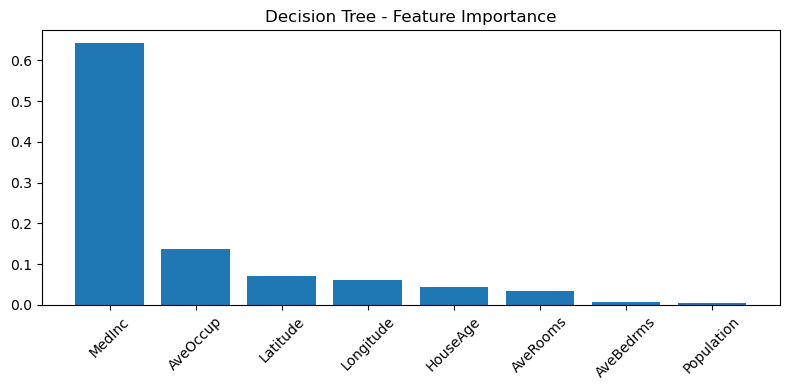

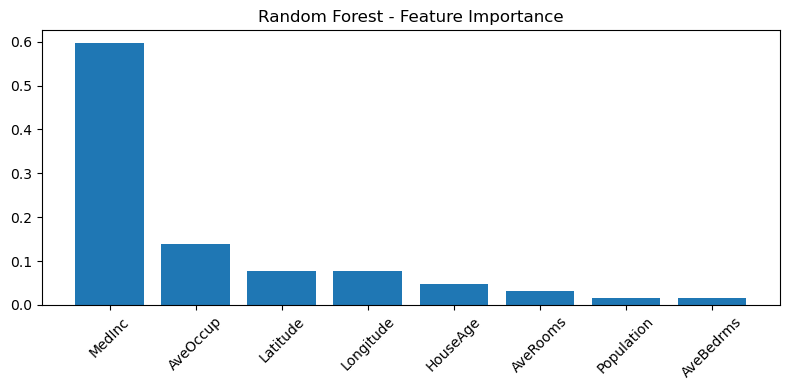

In [35]:
import matplotlib.pyplot as plt

def plot_feature_importance(model, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        features = X.columns
        indices = np.argsort(importances)[::-1]
        
        plt.figure(figsize=(8, 4))
        plt.title(f"{model_name} - Feature Importance")
        plt.bar(range(len(importances)), importances[indices], align="center")
        plt.xticks(range(len(importances)), features[indices], rotation=45)
        plt.tight_layout()
        plt.show()

plot_feature_importance(grid_dt.best_estimator_, "Decision Tree")
plot_feature_importance(random_rf.best_estimator_, "Random Forest")


In [37]:
import joblib

joblib.dump(lr, "linear_regression_model.pkl")
joblib.dump(grid_dt.best_estimator_, "decision_tree_model.pkl")
joblib.dump(random_rf.best_estimator_, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [39]:
report_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R²"])
print("\nModel Comparison Report:\n", report_df)



Model Comparison Report:
                Model       MAE      RMSE        R²
0  Linear Regression  0.533200  0.745581  0.575788
1      Decision Tree  0.417535  0.612231  0.713962
2      Random Forest  0.364535  0.542667  0.775271
